In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

In [2]:
# determine how many samples of each ancestry group
groupscsv = "../datasets/SraRunTableD1.txt"
goldstandard = "../datasets/1_gs.csv"
gs = pd.read_csv(goldstandard)
groups = pd.read_csv(groupscsv)

dfs = []

for group, df_by_group in groups.groupby('Population'):
    accession_numbers = df_by_group['Run'].values.tolist()
    gs_final = gs[gs['Run'].isin(accession_numbers)] #gs_final is a df containing the gold standard samples per population group
    dfs.append(gs_final)

europe_df = pd.concat([dfs[0],dfs[1],dfs[2],dfs[3]])
yoruba_df =dfs[4]

In [5]:

def accuracy_matrix(gs,all_total):
    missed_alleles = []
    tool_list =["optitype","rna2hla","arcas","seq2hla","hlahd","phlat","hlaforest","hlavbseq",'hlaminer']


    for t in tool_list:
        pre=pd.read_csv(f"../results/standard/{t}_d1.csv")

        ret = get_inaccurate_and_all_alleles(pre,gs)
        missed_alleles.append(ret[0])

    mis_total = []

    for tool in missed_alleles:
        mis_counts = [0,0,0,0,0]
        for allele in tool:
            if allele[0] == "A":
                mis_counts[0]+=1
            if allele[0] == "B":
                mis_counts[1] += 1
            if allele[0] == 'C':
                mis_counts[2] += 1
            if allele[0:2] == 'DR':
                mis_counts[3] += 1
            if allele[0:2] == 'DQ':
                mis_counts[4] += 1
        mis_total.append(mis_counts)

    percentage = mis_total/all_total
    accuracy = 1-percentage

    df = pd.DataFrame(accuracy)
    df.columns = ['A','B','C','DRB1','DQB1']
    df.index = tool_list
    return df


<AxesSubplot:>

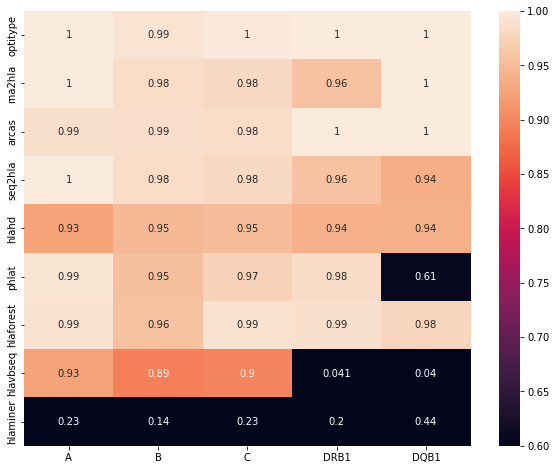

In [6]:
totals = np.array([423*2]*5) #5 element vector with # of gold standard A, B, C, DRB1, and DQB1
df = accuracy_matrix(europe_df,totals)

from matplotlib.colors import LogNorm, Normalize
plt.figure(figsize=(10,8))
sns.heatmap(df,annot=True,vmin=0.6,vmax=1)

<AxesSubplot:>

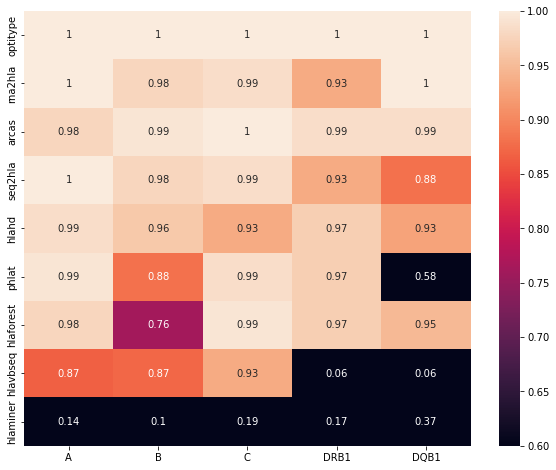

In [9]:
totals = np.array([67*2]*5) #5 element vector with # of gold standard A, B, C, DRB1, and DQB1
df = accuracy_matrix(yoruba_df,totals)

from matplotlib.colors import LogNorm, Normalize
plt.figure(figsize=(10,8))
sns.heatmap(df,annot=True,vmin=0.6,vmax=1)